<a href="https://colab.research.google.com/github/shinjeongdong/MLDeeplearningStudy/blob/main/%5BPyTorch%5D/%5BPyTorch%5D_4_1_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98_%EB%B0%8F_%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0_%EB%A7%8C%EC%A0%B8%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn, optim

STEP 1. 데이터 모으기

In [ ]:
# case 1
# N = 20
# random0 = torch.randn(int(N/2),1) #평균 0
# random5 = torch.randn(int(N/2),1) + 5 #평균 5
# class1_data = torch.hstack([random0, random5]) # [10,1] => [10,2] 두행렬을 행끼리 붙임 = 옆으로 붙임 #그럼 x1 = 평균 0, x2 = 평균5 짜리 데이터 = (0,5)위치에 해당
# class2_data = torch.hstack([random5, random0]) # 평균5 + 평균0 x1 = 평균5, x2 = 평균0 => (5,0) 위치
# #결론은 평균 (0,5), (5,0)인 좌표 데이터셋임
# class1_label = torch.ones(int(N/2),1) # 10,1짜리 1데이터 (0,5)짜리는 정답이 1
# class2_label = torch.zeros(int(N/2),1) # 10,1 짜리 0데이터
# X = torch.vstack([class1_data,class2_data]) # 아래로 행렬을 붙임 20,2
# y = torch.vstack([class1_label,class2_label]) #vertical 수직으로 스택을 쌓음
# print(class1_data)

# case2
N = 100

radius1 = 0.3 + 0.05 * torch.randn(int(N/2), 1)
radius2 = 1 + 0.01 * torch.randn(int(N/2), 1)

theta1 = 2 * torch.pi * torch.rand(int(N/2), 1) - torch.pi
theta2 = 2 * torch.pi * torch.rand(int(N/2), 1) - torch.pi

class1_data = torch.hstack([
    radius1 * torch.cos(theta1),
    radius1 * torch.sin(theta1)
])

class2_data = torch.hstack([
    radius2 * torch.cos(theta2),
    radius2 * torch.sin(theta2)
])

class1_label = torch.ones(int(N/2), 1)
class2_label = torch.zeros(int(N/2), 1)

X = torch.vstack([class1_data, class2_data])
y = torch.vstack([class1_label, class2_label])




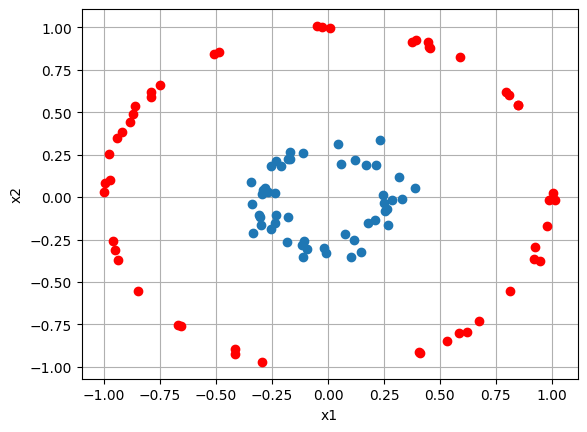

In [ ]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0],class1_data[:,1],'o')
plt.plot(class2_data[:,0],class2_data[:,1],'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

Step 2. 코드 실습

In [ ]:

class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    #case 1 plain
    self.linear1 = nn.Sequential(nn.Linear(2,1000),
                                nn.Sigmoid(),
                                nn.Linear(1000,1),
                                nn.Sigmoid())
    #case 2 = very simple
    # self.linear2 = nn.Sequential(nn.Linear(2,1), #선형이여서 비선형적 표현을 못함
    #                              nn.Sigmoid())


    #case 2 = very deep sigmoid
    # #이건 왜 충분히 비선형적으로 보이는데 학습이 안될까 => 시그모이드가 넘 많아서 기울기 소실이 일어난거
    # self.linear2 = nn.Sequential(nn.Linear(2,100),
    #                              nn.Sigmoid(),
    #                             *[i for _ in range(10) for i in [nn.Linear(100,100), nn.Sigmoid()]],
    #                             nn.Linear(100,1),
    #                             nn.Sigmoid())


    #case 2 = very deep Relu
    #이건 왜 충분히 비선형적으로 보이는데 학습이 안될까 => 시그모이드가 넘 많아서 기울기 소실이 일어난거
    self.linear2 = nn.Sequential(nn.Linear(2,100),
                                 nn.ReLU(),
                                *[i for _ in range(10) for i in [nn.Linear(100,100), nn.ReLU()]],
                                nn.Linear(100,1),
                                nn.Sigmoid())


    #case 3 = deep
    self.linear3 = nn.Sequential(nn.Linear(2,100),
                                nn.Sigmoid(),
                                nn.Linear(100,100),
                                nn.Sigmoid(),
                                nn.Linear(100,100),
                                nn.Sigmoid(),
                                nn.Linear(100,1),
                                nn.Sigmoid())
  def forward(self,x):
      x = self.linear2(x)
      return x


In [ ]:
model = MLP()
# print(model)
# print(model(torch.randn(5,2))) # [5,1]

STEP 3. 모델 학습시키기

In [ ]:


# LR = 1e-1
LR = 1e-2

# EPOCH = 100
EPOCH = 500

#optimizer = optim.SGD(model.parameters(),lr= LR)
optimizer = optim.Adam(model.parameters(),lr= LR)
criterion = nn.BCELoss()

loss_history = []
grad_history = []
update_size_history = []

model.train() # 학습 모드로 전환
for ep in range(EPOCH):
  # inference 추론
  y_hat = model(X) #예측 값
  #loss
  loss = criterion(y_hat,y) #그 예측값과 정답값으로 로스를 측정

  #prev weights
  #prev = model.linear1[0].weight.detach().clone()

  optimizer.zero_grad() # gd 누적 방지
  loss.backward() #역전파
  optimizer.step() # 업데이트

  loss_history += [loss.item()] #로스 저장용

  # print(f'Epoch : {ep+1} train_loss : {loss.item():.4f}')
  # print("-"*20)





Text(0, 0.5, 'loss')

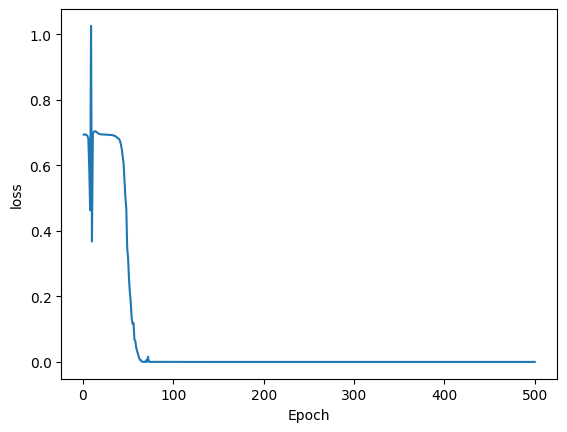

In [ ]:
#loss 그래프
x = torch.linspace(1,EPOCH,EPOCH)
plt.plot(x,loss_history)
plt.xlabel('Epoch')
plt.ylabel("loss")

In [ ]:
#BCE 검증
print(criterion(y_hat,y))
print(torch.sum(-torch.log(y_hat**y * (1-y_hat)**(1-y)))/N)
print(criterion(torch.tensor([0.]),torch.tensor([1.]))) # 발산이지만 100에서 멈춤

tensor(3.2848e-06, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(3.2807e-06, grad_fn=<DivBackward0>)
tensor(100.)


Step 4. 모델 테스트 하기

Text(0.5, 0.5, 'x2')

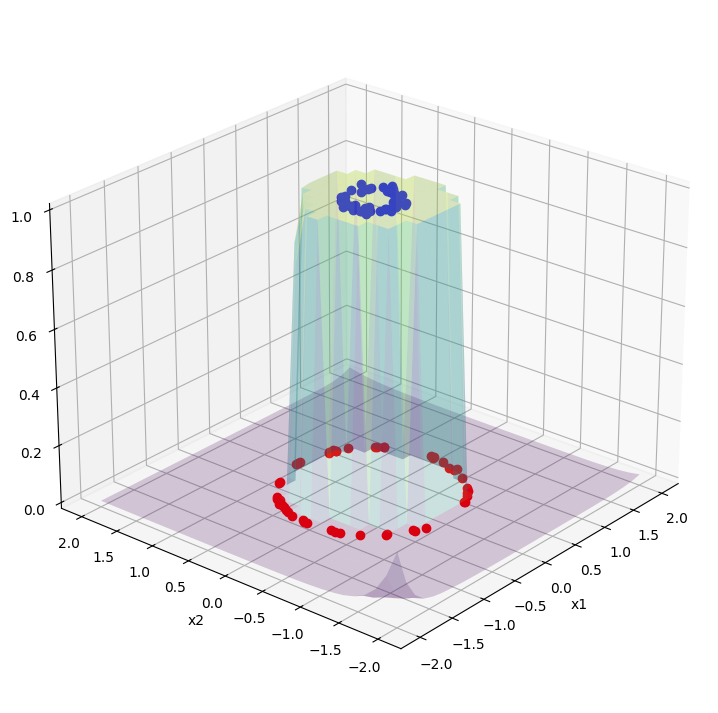

In [ ]:
# x1_test = torch.linspace(-10, 10, 30) #case 1
# x2_test = torch.linspace(-10, 10, 30)

x1_test = torch.linspace(-2, 2, 30) #case 2
x2_test = torch.linspace(-2, 2, 30)

X1_test, X2_test = torch.meshgrid(x1_test,x2_test)
#unsqeeze = 1인 차원 추가하는 함수 2번째 인덱스에, cat 텐서들을 차원에 맞춰 합쳐주는 함수 vstack
X_test = torch.cat([X1_test.unsqueeze(dim = 2), X2_test.unsqueeze(dim = 2)], dim = 2) #

model.eval()
with torch.no_grad():
  y_hat = model(X_test)

Y_hat = y_hat.squeeze()

plt.figure(figsize = [10,9])
ax = plt.axes(projection="3d")
ax.view_init(elev=25,azim=-140)
ax.plot_surface(X1_test,X2_test,Y_hat.numpy(),cmap = "viridis", alpha = 0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(),'bo')
plt.plot(class2_data[:,0],class2_data[:,1],class2_label.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")

In [ ]:
nn.Sequential(*[i for _ in range(10) for i in [nn.Linear(100,100), nn.Sigmoid()]])#리스트 컴프리핸션
#이걸로 10개의 층 생성가능.

Sequential(
  (0): Linear(in_features=100, out_features=100, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=100, out_features=100, bias=True)
  (7): Sigmoid()
  (8): Linear(in_features=100, out_features=100, bias=True)
  (9): Sigmoid()
  (10): Linear(in_features=100, out_features=100, bias=True)
  (11): Sigmoid()
  (12): Linear(in_features=100, out_features=100, bias=True)
  (13): Sigmoid()
  (14): Linear(in_features=100, out_features=100, bias=True)
  (15): Sigmoid()
  (16): Linear(in_features=100, out_features=100, bias=True)
  (17): Sigmoid()
  (18): Linear(in_features=100, out_features=100, bias=True)
  (19): Sigmoid()
)